<a href="https://colab.research.google.com/github/SachinLamichhane/Google-Colabs/blob/main/machine-learning-with-tensorflow/week-02/Week2_Notebook1_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing and Binary Classification with Keras

## Objective
In this week's exercise, you will:
1. Learn how to image preprocessing in keras.
2. Build and train a multilayer neural network for binary classification on a real-world dataset of cats and dogs.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## Step 2: Load and Preprocess the Data
We will use the Keras `ImageDataGenerator` for image augmentation and preprocessing.
First, unzip the uploaded dataset.


In [ ]:
!unzip -q cats_and_dogs.zip

## Step 3: Learn about undersampling and implement it
Research online what undersampling and random undersampling is. It is a very powerful technique used often in machine Learning. Find out when it is used and undersample your dataset using "random undersampling"

In [ ]:
# undersample your dataset here

---

## Step 4: Set Up ImageDataGenerator (or well more specifically the new version)
Were Sorry - the videos from the coursera course are sometimes not the most up to date. In this case the 'ImageDataGenerator' function is deprecated (look here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and will be removed in the future versions. The concept behind the new reccomended function is very similar though.
The new reccomendation is loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers.

You may use Chat GPT for this task and you can also check the following tutorials <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/guide/keras/preprocessing_layers <br>

In [39]:
# TODO create a dataset using the recommended methods
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/PetImages',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 610 images belonging to 2 classes.


---

## Step 5: Build a Multilayer Neural Network
Now, let's build a multilayer neural network for binary classification.


In [40]:
# TODO build a model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# TODO compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

---

## Step 6: Train the Model
Train the model using the Dataset you created


In [41]:
history = model.fit(
      train_generator,
      steps_per_epoch = 5,
      epochs=15,
      verbose=1)

Epoch 1/15
5/5 [==============================] - 61s 12s/step - loss: 0.1859 - accuracy: 0.9738
Epoch 2/15
5/5 [==============================] - 56s 11s/step - loss: 3.0396e-06 - accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 54s 11s/step - loss: 2.9976e-06 - accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 54s 11s/step - loss: 2.9494e-06 - accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 58s 11s/step - loss: 2.8860e-06 - accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 55s 10s/step - loss: 2.8191e-06 - accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 54s 10s/step - loss: 2.7356e-06 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 60s 11s/step - loss: 2.6431e-06 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 54s 11s/step - loss: 2.5347e-06 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 56s 11s/step - loss: 2.4265e-06 - accuracy: 

---

## Step 7: Evaluate the Model
After training, you may upload some test images to evaluate your model.


Saving 3.jpg to 3 (3).jpg
1/1 [==============================] - 0s 122ms/step
The model predicts that the image is of a cat


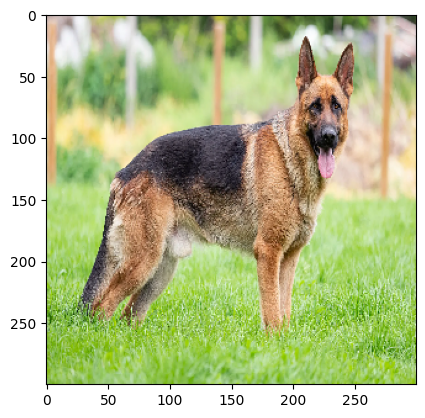

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

def load_and_predict(model):
    uploaded_files = files.upload()

    for fn in uploaded_files.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(300, 300))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255.0
        plt.imshow(img)

        classes = model.predict(x)
        result = "a dog" if classes[0] > 0.5 else "a cat"

        print(f'The model predicts that the image is of {result}')

# Call the function to upload images and get predictions

load_and_predict(model)